In [102]:
import h5py
import pandas as pd
import cv2
import numpy as np
import matplotlib.patches as patches
from matplotlib import pyplot as plt
from collections import namedtuple
from utils import compute_distance
from utils import remove_tracking_errors
from behaviour.tracking.tracking import prepare_tracking_data
from roi_analysis import get_timeinrois_stats

#path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\confined_shade_arena_exploration\03_02_20_sp5DLC_resnet50_large_spidersJan27shuffle1_1030000.h5'
path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\shade_arena_exploration\24_01_20_sp7-0DLC_resnet50_large_spidersJan27shuffle1_1030000.h5'
data = pd.read_hdf(path)
#for key in data:
 #   print(key)
centre_x, centre_y = (data['DLC_resnet50_large_spidersJan27shuffle1_1030000']['centre']['x'], 
                                        data['DLC_resnet50_large_spidersJan27shuffle1_1030000']['centre']['y'])
                                        

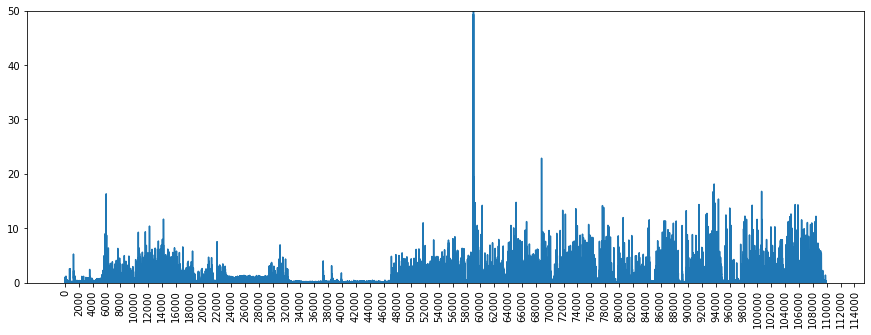

In [105]:
distance_per_frame = compute_distance(centre_x, centre_y)
fig, ax = plt.subplots(figsize=(15,5))
ax.set_ylim(0, 50)
#Adjust the x-axis label range and interval to better see which parts need to be excluded
plt.xticks(np.arange(0,520000, step=2000), rotation = 'vertical')
plt.plot(distance_per_frame)

In [108]:
#Introduce new limits to the data based on observation in previous step
trim_data = data [5000:]
trimmed_path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\shade_arena_exploration\24_01_20_sp7_trimmed_tracking.h5' 
trim_data.to_hdf(trimmed_path, key="hdf")


In [107]:
processed_path = r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\shade_arena_exploration\24_01_20_sp7_processed_centre_tracking.h5' 
transform_array = np.load(r'C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\shade_arena_exploration\24_01_20_sp7_transform.npy')
processed_data = prepare_tracking_data(trimmed_path, likelihood_th=0.9, median_filter=False, common_coord=True, ccm_mtx=transform_array, compute=True)
processed_data['centre'].to_hdf(processed_path, key="dsfsdf")
print(processed_data['centre'])

Processing: C:\Users\maksymilianm\Dropbox (UCL - SWC)\Project_spiders\Analysis\shade_arena_exploration\24_01_20_sp7_trimmed_tracking.h5
     registering to reference space
     computing speeds and angles
                 x           y  likelihood     speed  direction_of_movement  \
0       421.339010  344.529698         1.0  0.000000               0.000000   
1       421.500659  344.489778         1.0  0.166506              25.187667   
2       421.563671  344.519324         1.0  0.069594              45.463468   
3       421.371396  344.548447         1.0  0.194467              64.877759   
4       421.498545  344.487386         1.0  0.141050              79.456135   
...            ...         ...         ...       ...                    ...   
104880  187.683963  559.696504         1.0  0.112817              68.200001   
104881  187.648237  559.896527         1.0  0.203188              34.236024   
104882  187.647575  559.672455         1.0  0.224073              22.232882   
10488

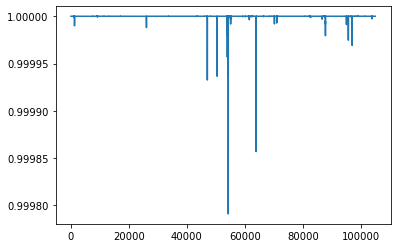

In [109]:
#Check if the errors are successfully removed 
centre_likelihood = (processed_data['centre']['likelihood'])
plt.plot(centre_likelihood)

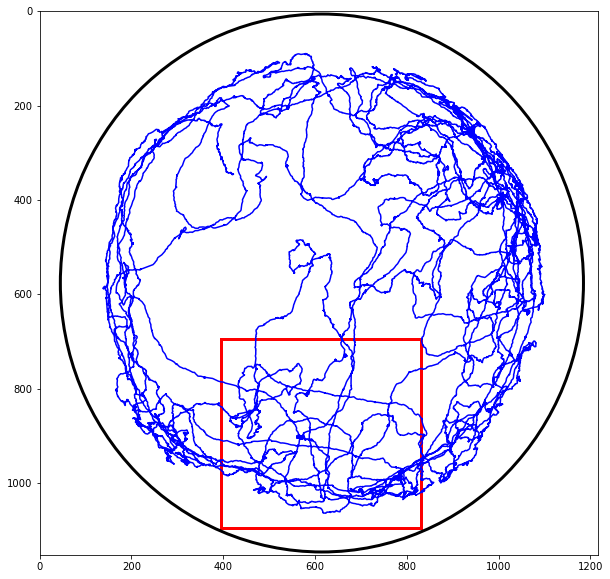

In [110]:
centre_x, centre_y = (processed_data['centre']['x'], processed_data['centre']['y'])
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(centre_x, centre_y, c='b')
ax.set_ylim(1152, 0)
ax.set_xlim(0, 1216)
#confined_shade_arena_exploration ROI
#ROI = patches.Rectangle((345,860),550,200,linewidth=3,edgecolor='r',facecolor='none')
#shade_arena_exploration ROI
ROI = patches.Rectangle((395,695),435,400,linewidth=3,edgecolor='r',facecolor='none')
arena = patches.Circle((615,576),570,linewidth=3,edgecolor='k',facecolor='none')
ax.add_patch(ROI)
ax.add_patch(arena)

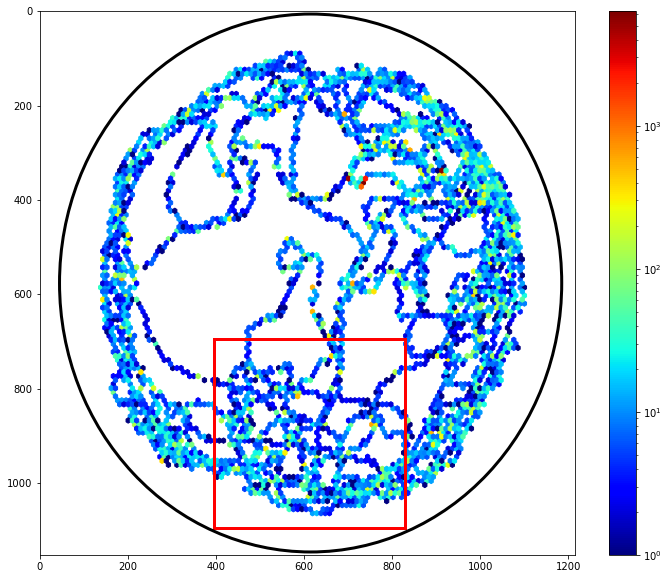

In [111]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_ylim(1152, 0)
ax.set_xlim(0, 1216)
plt.hexbin(centre_x,centre_y, bins = 'log', mincnt=1, cmap=plt.cm.jet)
plt.colorbar()
#confined_shade_arena_exploration ROI
#ROI = patches.Rectangle((345,860),550,200,linewidth=3,edgecolor='r',facecolor='none')
#shade_arena_exploration ROI
ROI = patches.Rectangle((395,695),435,400,linewidth=3,edgecolor='r',facecolor='none')
arena = patches.Circle((615,576),570,linewidth=3,edgecolor='k',facecolor='none')
ax.add_patch(ROI)
ax.add_patch(arena)

In [299]:
# Get XY tracking
x = processed_data['centre'].x.values
y = processed_data['centre'].y.values
xy = np.vstack([x, y]).T # creates an Nx2 array with N=number of frames and XY at each frame

# Define ROI position
position = namedtuple('position', ['topleft', 'bottomright'])
rois = {'shelter': position((345,860), (895,1060)),}

# Get ROI stats
res = get_timeinrois_stats(xy , rois, fps=40,  returndf=False, check_inroi=False)
print(res)

{'transitions_per_roi': {'none': 57, 'shelter': 56, 'tot': 113}, 'cumulative_time_in_roi': {'none': 220143, 'shelter': 25857, 'tot': 246000}, 'cumulative_time_in_roi_sec': {'none': 5503.575, 'shelter': 646.425, 'tot': 6150.0}, 'avg_time_in_roi': {'none': 3862.157894736842, 'shelter': 461.73214285714283, 'tot': 4323.890037593985}, 'avg_time_in_roi_sec': {'none': 96.55394736842105, 'shelter': 11.54330357142857, 'tot': 108.09725093984962}, 'avg_vel_in_roi': {'none': 1.172805840073762, 'shelter': 0.922317215765599, 'tot': 2.0951230558393608}}


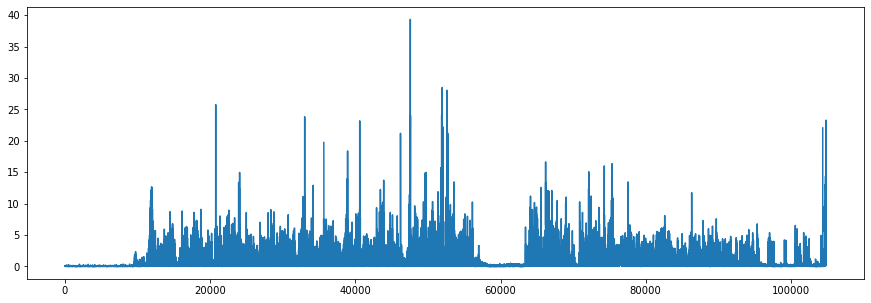

In [18]:
centre_x, centre_y = (processed_data['centre']['x'], processed_data['centre']['y'])
dpf = compute_distance(centre_x, centre_y)
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(dpf)

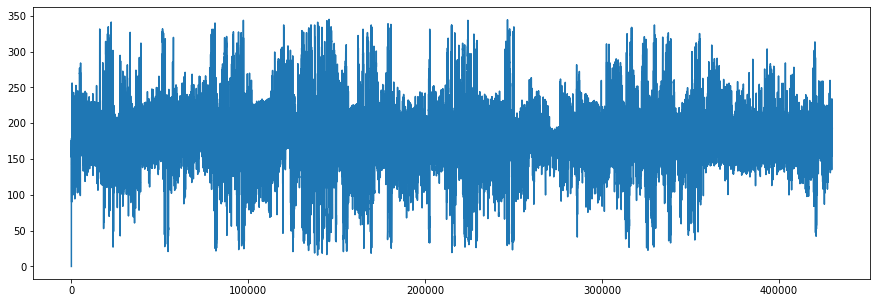

In [288]:
centre_ang_vel = (processed_data['centre']['direction_of_movement'])
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(centre_ang_vel)